In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
# data is from  here https://www.kaggle.com/datasets/abdurraziq01/cloud-computing-performance-metrics/code

# The data in this dataset was collected from a simulated cloud computing environment. The values represent a wide range of possible states and conditions in a cloud computing system.
# !wget -O ../data/raw/cloud_computing_performance_metrics.zip "https://www.kaggle.com/abdurraziq01/cloud-computing-performance-metrics/download?datasetVersionNumber=1"

df_kaggle = pd.read_csv("../data/raw/cloud_computing_performance_metrics.zip")
print(df_kaggle.shape)
df_kaggle.head().T

(2000000, 12)


,0,1,2,3,4
vm_id,c5215826-6237-4a33-9312-72c1df909881,29690bc6-1f34-403b-b509-a1ecb1834fb8,2e55abc3-5bad-46cb-b445-a577f5e9bf2a,e672e32f-c134-4fbc-992b-34eb63bef6bf,f38b8b50-6926-4533-be4f-89ad11624071
timestamp,2023-01-25 09:10:54,2023-01-26 04:46:34,2023-01-13 23:39:47,2023-02-09 11:45:49,2023-06-14 08:27:26
cpu_usage,54.88135,71.518937,NaN,54.488318,42.36548
memory_usage,78.950861,29.901883,92.709195,88.10096,NaN
network_traffic,164.775973,NaN,203.674847,NaN,NaN
power_consumption,287.808986,362.273569,231.467903,195.639954,359.451537
num_executed_instructions,7527.0,5348.0,5483.0,5876.0,3361.0
execution_time,69.345575,41.39604,24.602549,16.45667,55.307992
energy_efficiency,0.553589,0.349856,0.796277,0.529511,0.351907
task_type,network,io,io,compute,NaN


In [3]:
# this almost exactly matches a normal distribution
df_kaggle.describe().T

,count,mean,std,min,25%,50%,75%,max
cpu_usage,1800962.0,50.012232,28.876612,7.071203e-05,24.976747,50.054758,75.029342,99.999972
memory_usage,1799490.0,49.981898,28.853262,2.516784e-06,25.003777,49.976089,74.955877,99.999928
network_traffic,1800519.0,500.007572,288.579344,1.890490e-04,250.066890,500.007595,749.817454,999.999837
power_consumption,1799729.0,250.058370,144.363426,1.923802e-04,124.969511,250.247239,375.106907,499.999325
num_executed_instructions,1800314.0,5001.897146,2885.246927,0.000000e+00,2504.000000,5002.000000,7502.000000,9999.000000
execution_time,1800173.0,49.971327,28.861295,1.036192e-06,24.979080,49.964074,74.976502,99.999992
energy_efficiency,1799958.0,0.500252,0.288667,1.258445e-07,0.250163,0.500369,0.750362,1.000000


In [4]:
df_kaggle.columns

Index(['vm_id', 'timestamp', 'cpu_usage', 'memory_usage', 'network_traffic',
       'power_consumption', 'num_executed_instructions', 'execution_time',
       'energy_efficiency', 'task_type', 'task_priority', 'task_status'],
      dtype='object')

In [5]:
# the vms_id are unique except for null
df_kaggle["vm_id"].value_counts(dropna=False).reset_index().sort_values(
    by="count", ascending=False
)

,vm_id,count
0,NaN,200638
1199572,3b85d1e1-4734-4d95-a96c-3c81584efae2,1
1199583,ad14d5d1-4e96-48ca-9893-1baaa47e4cab,1
1199582,5651505d-14a2-41d6-989b-eec0aac9b922,1
1199581,e5970e5c-0350-4131-bd6c-4bd7e2c98df1,1
...,...,...
599783,68268879-da78-4ee1-b1f9-f30147ee97ff,1
599782,ada6c239-4a9c-4bc4-bb3d-d6c949f317e6,1
599781,19d9a93d-ddd7-4ba2-aa3f-4d2b6b02709b,1
599780,e829aa39-8559-42d1-aa91-3eeb6301faff,1


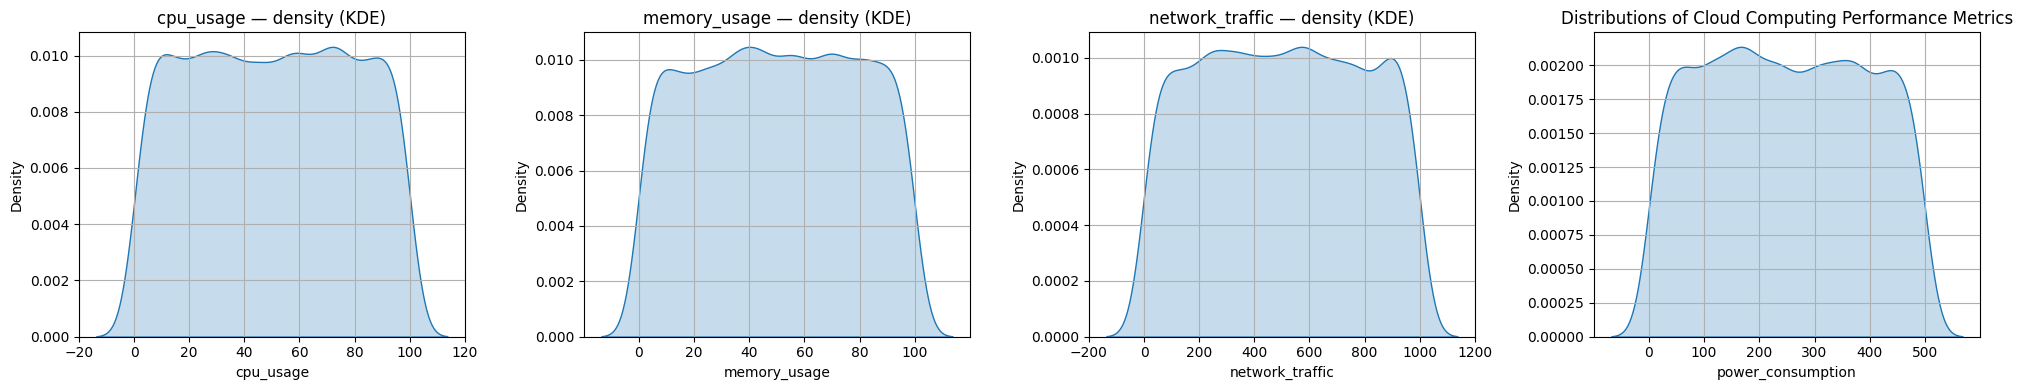

In [6]:
cols = ["cpu_usage", "memory_usage", "network_traffic", "power_consumption"]

fig, axes = plt.subplots(1, len(cols), figsize=(5 * len(cols), 4))
if len(cols) == 1:
    axes = [axes]

for ax, col in zip(axes, cols):
    if col not in df_kaggle.columns:
        ax.axis("off")
        ax.text(0.5, 0.5, f"Missing: {col}", ha="center", va="center")
        continue

    data = pd.to_numeric(df_kaggle[col], errors="coerce").dropna()
    if data.empty:
        ax.axis("off")
        ax.text(0.5, 0.5, f"No valid values: {col}", ha="center", va="center")
        continue

    if len(data) > 10000:
        data = data.sample(10000, random_state=0)

    sns.kdeplot(data, ax=ax, fill=True, bw_method="scott")
    ax.set_title(f"{col} — density (KDE)")
    ax.grid(True)

plt.title("Distributions of Cloud Computing Performance Metrics")
plt.tight_layout()
plt.show()

**Figure 1**: Comparing the density of cpu_usage, memory_usage, and network traffic

***

* `cpu_useage` and `memory_usage` are scaled with few discernable peaks or correlations.


In [7]:
# quick check of correlations
df_kaggle[["cpu_usage", "memory_usage", "network_traffic", "power_consumption"]].corr()

,cpu_usage,memory_usage,network_traffic,power_consumption
cpu_usage,1.000000,-0.001102,-0.000305,-0.001706
memory_usage,-0.001102,1.000000,-0.000914,0.000283
network_traffic,-0.000305,-0.000914,1.000000,-0.000076
power_consumption,-0.001706,0.000283,-0.000076,1.000000


## 2 - Borg Traces

* Get the Borg Trace (2019) from [Google](https://research.google/tools/datasets/google-cluster-workload-traces-2019/)
* taking a version of the [Big Query Pull](https://www.kaggle.com/datasets/derrickmwiti/google-2019-cluster-sample/data?select=borg_traces_data.csv) to get an idea of the data, and if useful will do the pull myself

In [8]:
df_borg = pd.read_csv("../data/raw/borg_traces.zip")
print(df_borg.shape)
df_borg.head().T

(405894, 34)


,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
time,0,2517305308183,195684022913,0,1810627494172
instance_events_type,2,2,6,2,3
collection_id,94591244395,260697606809,276227177776,10507389885,25911621841
scheduling_class,3,2,2,3,2
collection_type,1,0,0,0,0
priority,200,360,103,200,0
alloc_collection_id,0,221495397286,0,0,0
instance_index,144,335,376,1977,3907
machine_id,168846390496,85515092,169321752432,178294817221,231364893292


In [ ]:
df_borg.columns

# TODO: look at average_useage and max_useage columns


Index(['Unnamed: 0', 'time', 'instance_events_type', 'collection_id',
       'scheduling_class', 'collection_type', 'priority',
       'alloc_collection_id', 'instance_index', 'machine_id',
       'resource_request', 'constraint', 'collections_events_type', 'user',
       'collection_name', 'collection_logical_name',
       'start_after_collection_ids', 'vertical_scaling', 'scheduler',
       'start_time', 'end_time', 'average_usage', 'maximum_usage',
       'random_sample_usage', 'assigned_memory', 'page_cache_memory',
       'cycles_per_instruction', 'memory_accesses_per_instruction',
       'sample_rate', 'cpu_usage_distribution', 'tail_cpu_usage_distribution',
       'cluster', 'event', 'failed'],
      dtype='object')